
###  1. Business Understanding

We have been provided with Airbnb data set for analysis. This dataset comprises of calendar.csv , listings.csv and reviews.csv . However we will be concentrating on analysing only calendar and listings dataset.


In the following section we will try to address and provide information for following queries :-

* What is the most busiest time of the year?
* What is the average price per month in 2016 year?
* Does Price affect rating given by users?
* Does Price affect host response rate?
* What is the correlation of different features with price?

In [1]:
#Airbnb Seattle Data Analysis

In [2]:
###Importing necessary Libraries

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### 2. Data Understanding 
* Listings and Calendar have one to may relationship
* All price columns datatype needs to be change to numeric - Calendar and Listings
* In Calendar dataset we need to add more columns like year, month for data visualiation
* Listings dataset has 91 columns, and we need to extract only those which influence price - 
  for example :- id, host_response_time, host_response_rate, accommodates, bathrooms, bedrooms, beds, price,         weekly_price, monthly_price, cleaning_fee etc ...
* Listings and Reviews also have one to many relationship
* For our business questions we may not even require Reviews dataframe

In [3]:
###Reading the Calendar CSV files

calendar =pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Reading the Listing CSV files

In [4]:
###Reading the Listing CSV files
listing = pd.read_csv('listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### 3. Cleansing Data from Calendar CSV
"""
Remove dollar from price column.
We will not drop the nan values but replace it with mean of price value for accurate results.
We will convert listing_id to string so it doesnt interfere with metric columns.
We will calculate year , month and date columns for easy grouping.
Convert date column from object to date
"""


In [5]:
"""
Remove dollar from price column.
We will not drop the nan values but replace it with mean of price value for accurate results.
We will convert listing_id to string so it doesnt interfere with metric columns.
We will calculate year , month and date columns for easy grouping.
Convert date column from object to date
"""
replace_decimal = (lambda x:x[:-3].replace(',','.') if type(x) is str else x)
remove_dollar = (lambda x :x.replace('$','') if type(x) is str else x)

calendar['price'] = calendar.price.apply(replace_decimal)
calendar['price'] = calendar.price.apply(remove_dollar)
calendar['price'] = calendar['price'].astype(float)
calendar['price'].fillna(0,inplace=True)
calendar['listing_id'] = calendar.listing_id.astype(str)
calendar['date'] = pd.to_datetime(calendar['date'])

### Adding Columns date month and year 
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['date']= pd.DatetimeIndex(calendar['date']).date
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype    
---  ------      --------------    -----    
 0   listing_id  1393570 non-null  object   
 1   date        1393570 non-null  object   
 2   available   1393570 non-null  object   
 3   price       1393570 non-null  float64  
 4   month       1393570 non-null  int64    
 5   year        1393570 non-null  int64    
 6   month_year  1393570 non-null  period[M]
dtypes: float64(1), int64(2), object(3), period[M](1)
memory usage: 74.4+ MB


In [6]:
calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,0.0,1,2016,2016-01
3,241032,2016-01-07,f,0.0,1,2016,2016-01
4,241032,2016-01-08,f,0.0,1,2016,2016-01


Cleaning Up Listings CSV

In [7]:
"""
After cleaning the calendar CSV we will now perform cleanup of listing csv.
1.Listing CSV has 91 columns
2.We need to remove "," ,"$" and replace Nan values with mean for various columns like weekly_price,monthly_price,security_deposit,cleaning fee etc..
3. This is a humagous dataset and not all columns are required for our analysis so lets create a new dataframe with only specific columns.
4.For host_response_rate and review_scores_rating convert percentage to float.
5.Impute mode value for bathrooms ,beds etc
"""
listings_subset = listing[['id', 'host_response_time', 'host_response_rate','host_acceptance_rate', 'accommodates', 'bathrooms', 
                               'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee',
                              'extra_people', 'minimum_nights', 'review_scores_rating', 'instant_bookable', 'zipcode']]


In [8]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,96%,100%,4,1.0,1.0,1.0,$85.00,NaN,NaN,NaN,NaN,$5.00,1,95.0,f,98119
1,953595,within an hour,98%,100%,4,1.0,1.0,1.0,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,2,96.0,f,98119
2,3308979,within a few hours,67%,100%,11,4.5,5.0,7.0,$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00,1,NaN,f,98119
4,278830,within an hour,100%,NaN,6,2.0,3.0,3.0,$450.00,NaN,NaN,$700.00,$125.00,$15.00,1,92.0,f,98119


In [9]:
"""
Lambda function to fill nan value mode value of particular column
 
"""
fill_mode = lambda col:col.fillna(col.mode()[0])
listings_subset[['beds', 'bathrooms', 'bedrooms','id']] = listings_subset[['beds', 'bathrooms', 'bedrooms','id']].apply(fill_mode, axis=0)

In [10]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,96%,100%,4,1.0,1.0,1.0,$85.00,NaN,NaN,NaN,NaN,$5.00,1,95.0,f,98119
1,953595,within an hour,98%,100%,4,1.0,1.0,1.0,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,2,96.0,f,98119
2,3308979,within a few hours,67%,100%,11,4.5,5.0,7.0,$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00,1,NaN,f,98119
4,278830,within an hour,100%,NaN,6,2.0,3.0,3.0,$450.00,NaN,NaN,$700.00,$125.00,$15.00,1,92.0,f,98119


In [11]:
"""
Appying replace decimal and remove dollar for listing subset data and imputing the data.
"""
listings_subset['id'] = listings_subset['id'].astype(str)

listings_subset['price'] = listings_subset.price.apply(replace_decimal)
listings_subset['price'] = listings_subset.price.apply(remove_dollar)
listings_subset['price'] = listings_subset.price.astype(float)

listings_subset['weekly_price'] = listings_subset.weekly_price.apply(replace_decimal)
listings_subset['weekly_price'] = listings_subset.weekly_price.apply(remove_dollar)
listings_subset['weekly_price'] = listings_subset['weekly_price'].astype(float)
listings_subset['weekly_price'].fillna(0, inplace=True)

listings_subset['monthly_price'] = listings_subset.monthly_price.apply(replace_decimal)
listings_subset['monthly_price'] = listings_subset.monthly_price.apply(remove_dollar)
listings_subset['monthly_price'] = listings_subset['monthly_price'].astype(float)
listings_subset['monthly_price'].fillna(0, inplace=True)


listings_subset['security_deposit'] = listings_subset.security_deposit.apply(replace_decimal)
listings_subset['security_deposit'] = listings_subset.security_deposit.apply(remove_dollar)
listings_subset['security_deposit'] = listings_subset['security_deposit'].astype(float)
listings_subset['security_deposit'].fillna(0, inplace=True)

listings_subset['cleaning_fee'] = listings_subset.cleaning_fee.apply(replace_decimal)
listings_subset['cleaning_fee'] = listings_subset.cleaning_fee.apply(remove_dollar)
listings_subset['cleaning_fee'] = listings_subset['cleaning_fee'].astype(float)
listings_subset['cleaning_fee'].fillna(0, inplace=True)

listings_subset['extra_people'] = listings_subset.extra_people.apply(replace_decimal)
listings_subset['extra_people'] = listings_subset.extra_people.apply(remove_dollar)
listings_subset['extra_people'] = listings_subset['extra_people'].astype(float)

In [12]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,96%,100%,4,1.0,1.0,1.0,85.0,0.0,0.0,0.0,0.0,5.0,1,95.0,f,98119
1,953595,within an hour,98%,100%,4,1.0,1.0,1.0,150.0,1.0,3.0,100.0,40.0,0.0,2,96.0,f,98119
2,3308979,within a few hours,67%,100%,11,4.5,5.0,7.0,975.0,0.0,0.0,1.0,300.0,25.0,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,100.0,650.0,2.3,0.0,0.0,0.0,1,NaN,f,98119
4,278830,within an hour,100%,NaN,6,2.0,3.0,3.0,450.0,0.0,0.0,700.0,125.0,15.0,1,92.0,f,98119


In [13]:
listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   object 
 3   host_acceptance_rate  3045 non-null   object 
 4   accommodates          3818 non-null   int64  
 5   bathrooms             3818 non-null   float64
 6   bedrooms              3818 non-null   float64
 7   beds                  3818 non-null   float64
 8   price                 3818 non-null   float64
 9   weekly_price          3818 non-null   float64
 10  monthly_price         3818 non-null   float64
 11  security_deposit      3818 non-null   float64
 12  cleaning_fee          3818 non-null   float64
 13  extra_people          3818 non-null   float64
 14  minimum_nights        3818 non-null   int64  
 15  review_scores_rating 

In [14]:
""" This module will work on converting host response rate to float and will remove percentage value"""
convert_percentage =(lambda x:(float(x.replace('%', ''))/100.0) if type(x) is str else x)
listings_subset['host_response_rate'] = listings_subset.host_response_rate.apply(convert_percentage)
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,0.96,100%,4,1.0,1.0,1.0,85.0,0.0,0.0,0.0,0.0,5.0,1,95.0,f,98119
1,953595,within an hour,0.98,100%,4,1.0,1.0,1.0,150.0,1.0,3.0,100.0,40.0,0.0,2,96.0,f,98119
2,3308979,within a few hours,0.67,100%,11,4.5,5.0,7.0,975.0,0.0,0.0,1.0,300.0,25.0,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,100.0,650.0,2.3,0.0,0.0,0.0,1,NaN,f,98119
4,278830,within an hour,1.00,NaN,6,2.0,3.0,3.0,450.0,0.0,0.0,700.0,125.0,15.0,1,92.0,f,98119


### 4. Data Modelling and Results of AirBnB data 

"""
In this section we will perform data modelling and share the results for Airbnb Seattle data.
We will address our 5 questions mentioned earlier and try to share insights for same.
"""

### What is the most busiest time of the year?

In [15]:
calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,0.0,1,2016,2016-01
3,241032,2016-01-07,f,0.0,1,2016,2016-01
4,241032,2016-01-08,f,0.0,1,2016,2016-01


In [16]:
calendar_2016 = calendar[calendar.year ==2016]

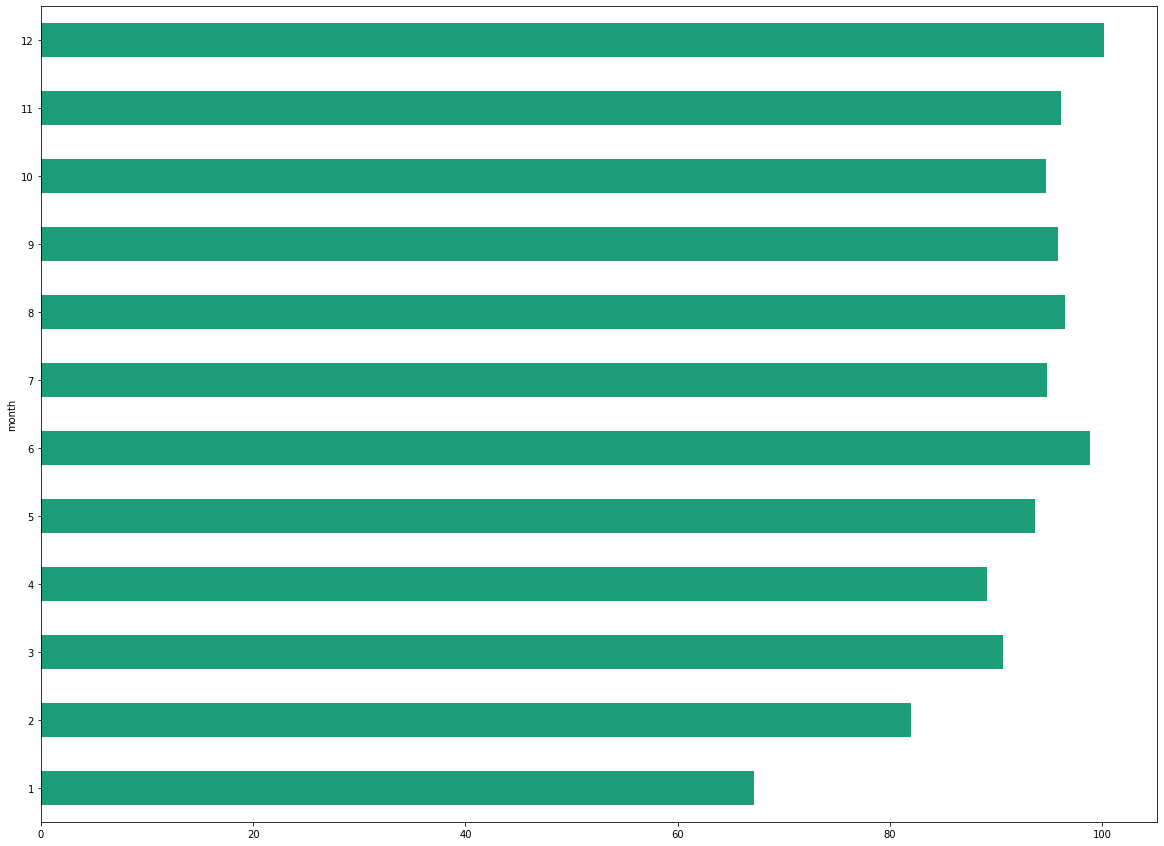

In [17]:
"""
Bar Diagram to depict the busiest time of the year.
"""
busy_time = calendar_2016.groupby('month')['price'].mean()
busy_time.plot(kind ='barh',figsize =(20,15), colormap="Dark2");

No wonder December is the most busiest time of the year with Xmas and New year being around!! Second most busiest month is June.

### What is the average price per month in 2016 year?

91.88108018780115

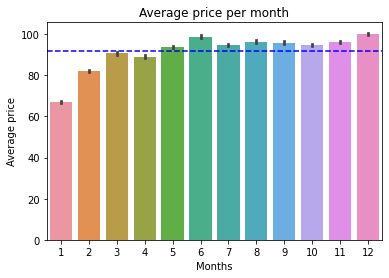

In [18]:
"""
Analyze the price over period of time
"""
sns.barplot(data = calendar_2016, x ='month', y = 'price')
plt.ylabel('Average price')
plt.xlabel('Months')
plt.title('Average price per month');
plt.axhline(calendar_2016.price.mean(), linestyle='--', color='blue');

calendar_2016.price.mean()

91.881 is the average price per month

In [19]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,0.96,100%,4,1.0,1.0,1.0,85.0,0.0,0.0,0.0,0.0,5.0,1,95.0,f,98119
1,953595,within an hour,0.98,100%,4,1.0,1.0,1.0,150.0,1.0,3.0,100.0,40.0,0.0,2,96.0,f,98119
2,3308979,within a few hours,0.67,100%,11,4.5,5.0,7.0,975.0,0.0,0.0,1.0,300.0,25.0,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,100.0,650.0,2.3,0.0,0.0,0.0,1,NaN,f,98119
4,278830,within an hour,1.00,NaN,6,2.0,3.0,3.0,450.0,0.0,0.0,700.0,125.0,15.0,1,92.0,f,98119


### Does Price affect rating given by users?



In [20]:
price_users = listings_subset.groupby('review_scores_rating')['price'].mean()

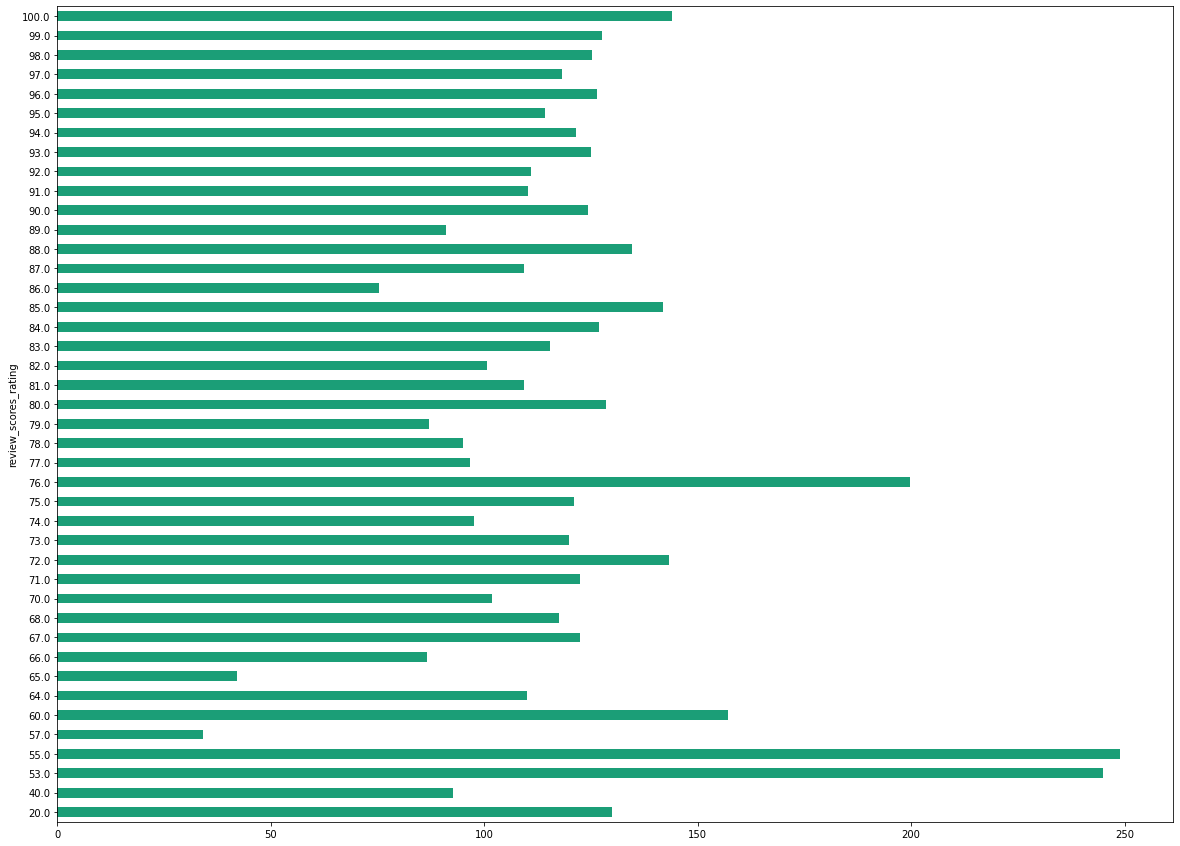

In [21]:
price_users.plot(kind ='barh',figsize =(20,15), colormap="Dark2");

No from below bar graph we can see that price doesnt affect rating given by user.

### Does Price affect host response rate?

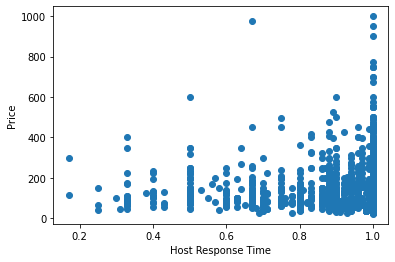

In [22]:
"""
Scatter Plot to depict host response rate.
"""
price_users = listings_subset['host_response_rate']
price_mean = listings_subset['price']
plt.xlabel("Host Response Time")
plt.ylabel("Price")
plt.scatter(price_users, price_mean)
plt.show()

The scatter plot shows host response rate affects price. Lower priced listing hosts respond quicker.

### What is the correlation of different features with price?

In [23]:
listings_subset.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,0.96,100%,4,1.0,1.0,1.0,85.0,0.0,0.0,0.0,0.0,5.0,1,95.0,f,98119
1,953595,within an hour,0.98,100%,4,1.0,1.0,1.0,150.0,1.0,3.0,100.0,40.0,0.0,2,96.0,f,98119
2,3308979,within a few hours,0.67,100%,11,4.5,5.0,7.0,975.0,0.0,0.0,1.0,300.0,25.0,4,97.0,f,98119
3,7421966,NaN,NaN,NaN,3,1.0,0.0,2.0,100.0,650.0,2.3,0.0,0.0,0.0,1,NaN,f,98119
4,278830,within an hour,1.00,NaN,6,2.0,3.0,3.0,450.0,0.0,0.0,700.0,125.0,15.0,1,92.0,f,98119


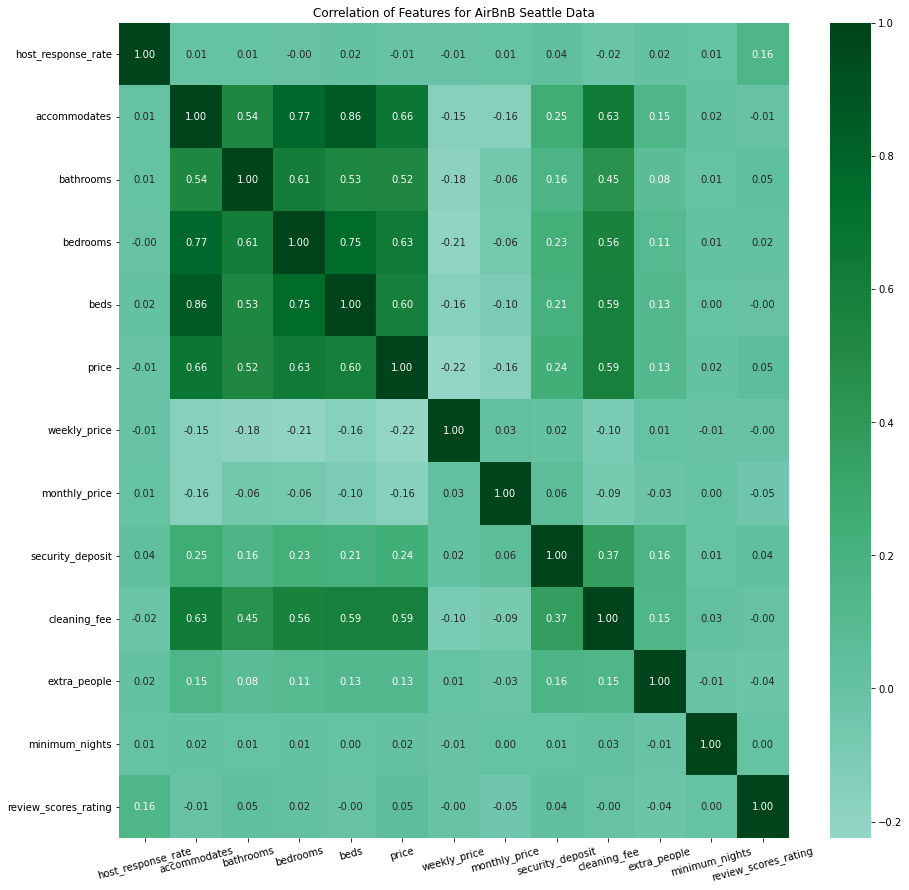

In [24]:
"""
Finding the correlation of different features with price
"""
listing_corr = listings_subset.corr()

kot = listing_corr[listing_corr.apply(lambda x: abs(x)>=0)]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(kot, annot = True, fmt='.2f', cmap = 'BuGn', center = 0, ax=ax)
plt.title('Correlation of Features for AirBnB Seattle Data');
plt.xticks(rotation = 15);
